In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/Nas-virat/Telco-Customer-Churn/main/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check info
df.info()

# Check first 10 rows
df.head(10)

# Check missing values
df.isnull().sum()

# Basic statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Drop customerID column (not needed)
df.drop('customerID', axis=1, inplace=True)

# Convert 'TotalCharges' to numeric (it has spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values in TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Convert target column 'Churn' to 0/1
df['Churn'] = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

# Convert Yes/No categorical columns to 0/1
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in yes_no_cols:
    df[col] = df[col].apply(lambda x: 1 if x=='Yes' else 0)

# One-hot encode remaining categorical columns
df = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

print("Data cleaned & ready for ML!")
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Data cleaned & ready for ML!
Features shape: (7043, 30)
Target shape: (7043,)


/tmp/ipython-input-4224661993.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100,2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 79.84 %

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1539
           1       0.69      0.47      0.56       574

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113


Confusion Matrix:
 [[1415  124]
 [ 302  272]]


                           Feature  Importance
7                     TotalCharges    0.190020
3                           tenure    0.173978
6                   MonthlyCharges    0.169206
28  PaymentMethod_Electronic check    0.037827
11     InternetService_Fiber optic    0.035932
26               Contract_Two year    0.032281
8                      gender_Male    0.028819
14              OnlineSecurity_Yes    0.027931
5                 PaperlessBilling    0.025171
1                          Partner    0.023292


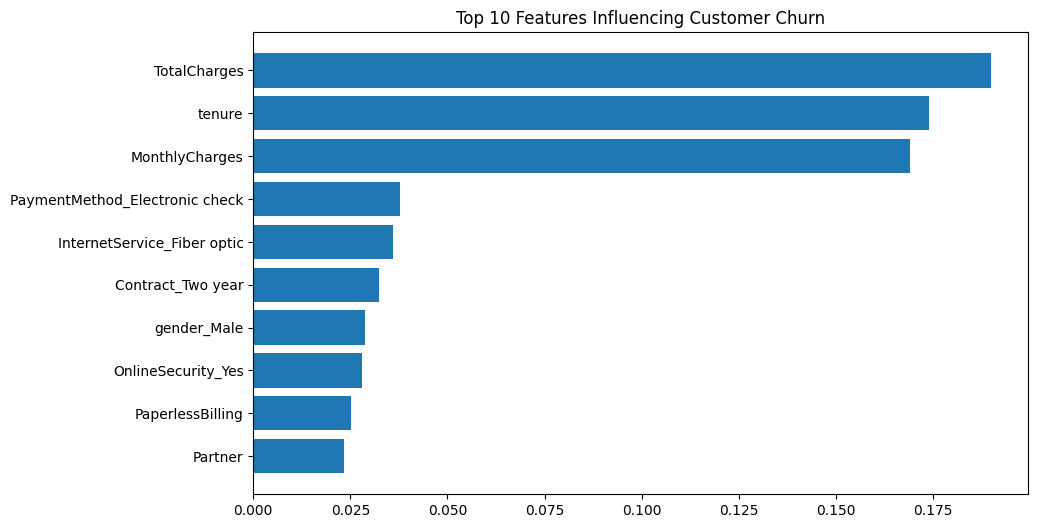

In [ ]:
# Get feature importance
import matplotlib.pyplot as plt

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Show top 10 features
top_features = feature_importances.head(10)
print(top_features)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()
plt.title("Top 10 Features Influencing Customer Churn")
plt.show()


In [ ]:
# Get churn probability for the positive class
y_prob = rf.predict_proba(X)[:,1]

# Add predictions & probability to the original dataframe
df['Churn_Predicted'] = rf.predict(X)
df['Churn_Probability'] = y_prob

# Export to CSV
df.to_csv("Customer_Churn_Predictions.csv", index=False)

# Download in Colab
from google.colab import files
files.download("Customer_Churn_Predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders


In [ ]:
# Get the exact filename uploaded
filename = list(uploaded.keys())[0]  # takes the uploaded file name automatically

# Load CSV
data = pd.read_csv(filename)

# Preview first rows and columns
print("Columns:", data.columns)
data.head()


Columns: Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Predicted', 'Churn_Probability'],
      dtype='object')


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Predicted,Churn_Probability
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,False,False,False,False,False,True,False,0,0.22
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,False,False,True,False,False,False,True,0,0.00
2,0,0,0,2,1,1,53.85,108.15,1,True,...,False,False,False,False,False,False,False,True,1,0.77
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,False,False,False,True,False,False,False,False,0,0.00
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,True,False,1,0.78


In [ ]:
# Fill missing numeric columns with 0
numeric_cols = data.select_dtypes(include=['int64','float64']).columns
data[numeric_cols] = data[numeric_cols].fillna(0)

# Fill missing categorical columns with most frequent value
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Check if any missing values remain
print("Missing values per column:\n", data.isna().sum())


Missing values per column:
 SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet se

In [ ]:
# Create critical alert column (>=0.70)
threshold = 0.70
data['critical_alert'] = data['Churn_Probability'] >= threshold

# Preview critical customers
critical_customers = data[data['critical_alert']]
critical_customers.head()

# Save to Excel for email
critical_customers.to_excel("critical_customers.xlsx", index=False)
print(f"Total critical churn customers: {len(critical_customers)}")


Total critical churn customers: 1300


In [21]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email.mime.text import MIMEText
from email import encoders

# SETTINGS
sender = "aishwaryap3011@gmail.com"       # Your Gmail
receiver = "ossumaish3011@gmail.com"       # Recipient
password = "agmchnjqchelvwfx"  # Your App Password
filename = "critical_customers.xlsx"  # File to attach
subject = "Daily Critical Churn Customers"

# Create message
msg = MIMEMultipart()
msg['From'] = sender
msg['To'] = receiver
msg['Subject'] = subject

# Add body text
body = f"Daily Critical Churn Alert\n\nPlease see attached file.\nTotal critical customers: 1300"
msg.attach(MIMEText(body, 'plain'))

# Attach Excel file
try:
    with open(filename, "rb") as attachment:
        part = MIMEBase("application", "octet-stream")
        part.set_payload(attachment.read())
        encoders.encode_base64(part)
        part.add_header("Content-Disposition", f"attachment; filename={filename}")
        msg.attach(part)
except FileNotFoundError:
    print(f"Error: File '{filename}' not found. Make sure it exists.")
    raise

# Send email
try:
    server = smtplib.SMTP("smtp.gmail.com", 587)
    server.starttls()
    server.login(sender, password)
    server.send_message(msg)
    server.quit()
    print("✅ Email sent successfully!")
except smtplib.SMTPAuthenticationError:
    print("❌ Authentication Error: Check your App Password and Gmail settings.")
except smtplib.SMTPRecipientsRefused:
    print("❌ Recipient Refused: Check the receiver email address.")
except Exception as e:
    print("❌ Error sending email:", e)


✅ Email sent successfully!
